# Multilayer Perceptron and Backpropagation

In [62]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Question 1 

Consider the neural network considered in the first question of the theoretical component of the practical class, with number of units: 4,4,3,3.

![](https://drive.google.com/uc?id=1SHUgdosKp6AX8rRAACCZ5nb4kUXreI3g)

Assume all units, except the ones in the output layer, use the hyperbolic tangent activation function. 

Consider the following training example:

$\mathbf{x} =\begin{bmatrix} 1, 0, 1, 0 \end{bmatrix}^\intercal $,   $\mathbf{y} =\begin{bmatrix} 0\\ 1\\ 0 \end{bmatrix}$

❓ Using the squared error loss do a stochastic gradient descent update, initializing all connection weights and biases to 0.1 and a  learning rate η = 0.1:

1. Perform the forward pass
2. Compute the loss
3. Compute gradients with backpropagation
4. Update weights

In [63]:
inputs = np.array([[1, 0, 1, 0]])
labels = np.array([[0, 1, 0]])

# First is input size, last is output size.
units = [4, 4, 3, 3]

W_0 = np.random.randn(units[1], units[0] + 1) * 0.1
W_1 = np.random.randn(units[2], units[1] + 1) * 0.1
W_2 = np.random.randn(units[3], units[2] + 1) * 0.1

input_w_bias = np.hstack((np.ones((inputs.shape[0], 1)), inputs)).T

n = 0.1 

phi = np.tanh
phi_deriv = lambda x: 1 - np.tanh(x)**2

print(input_w_bias.shape) 
print(W_0.shape)

(5, 1)
(4, 5)


In [64]:
a_1 = W_0 @ input_w_bias
h_1 = phi(a_1)

h_1_bias = np.vstack((np.ones((1, h_1.shape[1])), h_1))

a_2 = W_1 @  h_1_bias
h_2 = phi(a_2)

h_2_bias = np.vstack((np.ones((1, h_2.shape[1])), h_2))

a_3 = W_2 @  h_2_bias
h_3 = a_3

In [65]:
loss = np.mean((h_3 - labels.T) ** 2)

In [66]:
# Backpropagation
dE_da3 = 2 * (h_3 - labels.T) / labels.shape[0]
dE_dW2 = dE_da3 @ h_2_bias.T
dE_dh2 = W_2[:, 1:].T @ dE_da3
dE_da2 = dE_dh2 * phi_deriv(a_2)
dE_dW1 = dE_da2 @ h_1_bias.T
dE_dh1 = W_1[:, 1:].T @ dE_da2
dE_da1 = dE_dh1 * phi_deriv(a_1)
dE_dW0 = dE_da1 @ input_w_bias.T

In [67]:
# Update Weights
W_2 -= n * dE_dW2
W_1 -= n * dE_dW1
W_0 -= n * dE_dW0

❓ Let's say we were using the same training example but with the following changes:
- The output units have a softmax activation function
- The error function is cross-entropy

Keeping the same initializations and learning rate, adjust your computations to the new changes.

**Solution:** We need only to change:  
- the output, *i.e.*, $\hat{y} = softmax(z_3)$ instead of $\hat{y} = z_3$
- the loss computation to $L = -y.log(\hat{y})$
- the gradient of the loss with respect to $z_3$: $\frac{dL}{dz_3}$

All other steps remain unchanged.

In [68]:
# Your code here

phi_2 = lambda x: np.exp(x) / np.sum(np.exp(x), axis=0)

cross_entropy_loss = lambda x : -np.dot(labels, np.log(x))

In [69]:
h_3 = phi_2(a_3)

loss = cross_entropy_loss(h_3)

dE_da3 = h_3 - labels.T
dE_dW2 = dE_da3 @ h_2_bias.T
dE_dh2 = W_2[:, 1:].T @ dE_da3
dE_da2 = dE_dh2 * phi_deriv(a_2)
dE_dW1 = dE_da2 @ h_1_bias.T
dE_dh1 = W_1[:, 1:].T @ dE_da2
dE_da1 = dE_dh1 * phi_deriv(a_1)
dE_dW0 = dE_da1 @ input_w_bias.T

# Update Weights
W_2 -= n * dE_dW2
W_1 -= n * dE_dW1
W_0 -= n * dE_dW0

❓ Complete functions `forward`, `compute_loss`, `backpropagation` and `update_weights` generalized to perform the same computations as before, but for any MLP architecture.

In [70]:
'''
x: single observation of shape (n,)
weights: list of weight matrices [W1, W2, ...]
biases: list of biases matrices [b1, b2, ...]

y: final output
hiddens: list of computed hidden layers [h1, h2, ...]
'''

def forward(x, weights, biases):
    num_layers = len(weights)
    g = np.tanh
    a = []
    hiddens = []

    # compute hidden layers
    for i in range(num_layers - 1):
        # calulate a_i and h_i
        if i == 0:
            current_a = weights[i] @ x + biases[i]
        else:
            current_a = weights[i] @ hiddens[-1] + biases[i]
        current_h = g(current_a)
        a.append(current_a)
        hiddens.append(current_h)

    # compute output layer
    output = weights[-1] @ hiddens[-1] + biases[-1]
    
    return output, hiddens

def compute_loss(output, y):
    # compute loss
    probs = np.exp(output) / np.sum(np.exp(output))
    loss = -np.dot(y, np.log(probs))
    return loss   

def backward(x, y, output, hiddens, weights):
    num_layers = len(weights)
    
    probs = np.exp(output) / np.sum(np.exp(output))
    grad_z = probs - y  
    
    grad_weights = []
    grad_biases = []
    
    # Backpropagate gradient computations 
    for i in range(num_layers-1, -1, -1):
        
        # Gradient of hidden parameters.
        if i == num_layers - 1:
            h_prev = hiddens[i-1] if i > 0 else x
            grad_W = np.outer(grad_z, h_prev)
            grad_b = grad_z
            grad_weights.append(grad_W)
            grad_biases.append(grad_b)
        else:
            # Backpropagate to previous layer
            grad_h = weights[i+1].T @ grad_z
            grad_a = grad_h * (1 - hiddens[i] ** 2)  # Derivative of tanh
            grad_z = grad_a
            
            h_prev = hiddens[i-1] if i > 0 else x
            grad_W = np.outer(grad_z, h_prev)
            grad_b = grad_z
            grad_weights.append(grad_W)
            grad_biases.append(grad_b)
        
    # Making gradient vectors have the correct order
    grad_weights.reverse()
    grad_biases.reverse()
    return grad_weights, grad_biases

## Question 2

Now we will use the MLP on real data to classify handwritten digits.

Data is loaded, split into train and test sets and target is one-hot encoded below:

In [71]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

data = load_digits()

inputs = data.data  
labels = data.target  
n, p = np.shape(inputs)
n_classes = len(np.unique(labels))


X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42)

# Encode labels as one-hot vectors.
one_hot = np.zeros((np.size(y_train, 0), n_classes))
for i in range(np.size(y_train, 0)):
    one_hot[i, y_train[i]] = 1
y_train_ohe = one_hot
one_hot = np.zeros((np.size(y_test, 0), n_classes))
for i in range(np.size(y_test, 0)):
    one_hot[i, y_test[i]] = 1
y_test_ohe = one_hot

❓ Complete function `MLP_train_epoch` using your previously defined functions to compute one epoch of training using SGD:

In [72]:
'''
Outputs:
    - weights: list of updated weights
    - biases: list of updated 
    - loss: scalar of total loss (sum for all observations)

'''

def MLP_train_epoch(inputs, labels, weights, biases, learning_rate):
    num_layers = len(weights)
    total_loss = 0
    
    # For each observation and target
    for i in range(inputs.shape[0]):
        # Compute forward pass
        output, hiddens = forward(inputs[i], weights, biases)
        
        # Compute Loss and update total loss
        loss = compute_loss(output, labels[i])
        total_loss += loss
        
        # Compute backpropagation
        grad_weights, grad_biases = backward(inputs[i], labels[i], output, hiddens, weights)
        
        # Update weights
        for j in range(num_layers):
            weights[j] -= learning_rate * grad_weights[j]
            biases[j] -= learning_rate * grad_biases[j]
            
    return weights, biases, total_loss

Let's use a MLP with a single hidden layer of 50 units and a learning rate of $0.001$. 

❓ Run 100 epochs of your MLP. Save the loss at each epoch in a list and plot the loss evolution after training.

Epoch 10, Loss: 212.51754678958724
Epoch 20, Loss: 96.72612458605529
Epoch 30, Loss: 60.20860436210406
Epoch 40, Loss: 43.50153010883951
Epoch 50, Loss: 33.26274367083264
Epoch 60, Loss: 26.494399359662385
Epoch 70, Loss: 21.955099766717954
Epoch 80, Loss: 18.727542683454306
Epoch 90, Loss: 16.217304549198303
Epoch 100, Loss: 14.253861463314193


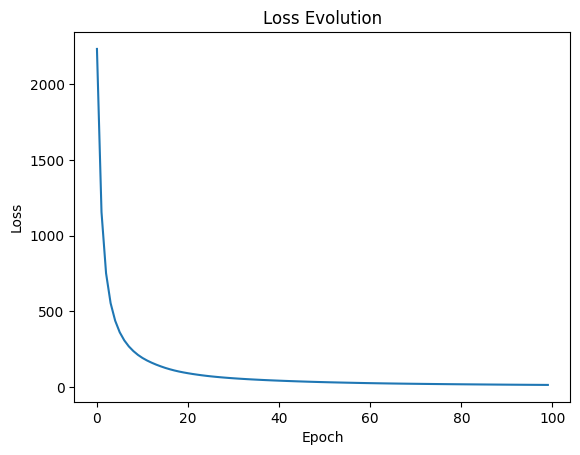

In [73]:
units = [X_train.shape[1], 50, y_train_ohe.shape[1]]
# Initialize weights
weights = [np.random.randn(units[1], units[0]) * 0.1, 
           np.random.randn(units[2], units[1]) * 0.1]
biases = [np.zeros((units[1],)), np.zeros((units[2],))]

# Empty loss list
loss_history = []

# Learning rate.
n = 0.001
    
# Run epochs and append loss to list
for epoch in range(100):
    weights, biases, epoch_loss = MLP_train_epoch(X_train, y_train_ohe, weights, biases, n)
    loss_history.append(epoch_loss)
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {epoch_loss}")


# Plot loss evolution
# Plot loss evolution
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Evolution')
plt.show()

❓ Complete function `MLP_predict` to get array of predictions from your trained MLP:

In [74]:
def MLP_predict(inputs, weights, biases):
    predicted_labels = []
    for x in inputs:
        output, _ = forward(x, weights, biases)
        predicted_label = np.argmax(output)
        predicted_labels.append(predicted_label)
    predicted_labels = np.array(predicted_labels)
    return predicted_labels

❓ Compute the accuracy on the train and test sets.

In [75]:
y_pred_train = MLP_predict(X_train, weights, biases)
y_pred_test = MLP_predict(X_test, weights, biases)

train_acc = np.mean(y_pred_train == y_train)
test_acc = np.mean(y_pred_test == y_test)

print(f"Train Accuracy: {train_acc}")
print(f"Test Accuracy: {test_acc}")

Train Accuracy: 1.0
Test Accuracy: 0.975


We can compare our results with Sklearn's implementation of the MLP. Compare their accuracies:

In [76]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(50),
                    activation='tanh',
                    solver='sgd',
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    nesterovs_momentum=False,
                    random_state=1,
                    max_iter=1000)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9993041057759221
0.9722222222222222
